# REPORT EXPLORATORY DATA ANALYSIS PLOTS

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path
plt.style.use('seaborn-v0_8-ticks')
cwd = str(Path().resolve().parent)
sys.path.append(cwd)
from utils.data_preparation import preprocess_data, split_data, split_data_validation
os.chdir(cwd)

In [5]:
features = ['h_poly', 'h', 'GV1', 'GV3', 'GV51', 'MB4', 'MB8', 'MB10', 'MB18', \
            'P', 'T', 't', 'ln_t', 'Cos_s', 'Sin_s', 'Cos_2s', 'Sin_2s', 'month', 'year', \
            'h_MA_007', 'h_MA_014', 'h_MA_060', 'h_MA_180', 'h_RC_007', 'h_RC_030', 'T_MA_001', 'T_MA_007', 'T_MA_014', 'T_MA_030', \
            'P_RS_030', 'P_RS_060', 'P_RS_090', 'P_RS_180']
target = 'h'
poly_degree = 4
start_date = "08-01-2020"
end_date = "03-01-2025"
validation_size = 0.2
test_size = 0.2

X, y, dates = preprocess_data(features, target, start_date, end_date, poly_degree=poly_degree, \
                               test_size=test_size, validation_size=validation_size)
    
X_train, X_val, X_test, y_train, y_val, y_test, split_idx_val, split_idx_test = split_data_validation(X, y, validation_size=validation_size, test_size=test_size)
X_all = pd.concat([X_train, X_val, X_test])

In [6]:
print(X_train)

          Sin_s     Cos_s    Sin_2s    Cos_2s     t      ln_t  month  year  \
0     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
1     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
2     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
3     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
4     -0.516062 -0.856551  0.884068  0.467359     1  0.000000      8  2020   
...         ...       ...       ...       ...   ...       ...    ...   ...   
24086  0.871706 -0.490029 -0.854322 -0.519744  1004  6.911747      5  2023   
24087  0.871706 -0.490029 -0.854322 -0.519744  1004  6.911747      5  2023   
24088  0.871706 -0.490029 -0.854322 -0.519744  1004  6.911747      5  2023   
24089  0.871706 -0.490029 -0.854322 -0.519744  1004  6.911747      5  2023   
24090  0.871706 -0.490029 -0.854322 -0.519744  1004  6.911747      5  2023   

       h_poly_1       h_poly_2  ...  h_RC_007  h_RC_030   T_MA_

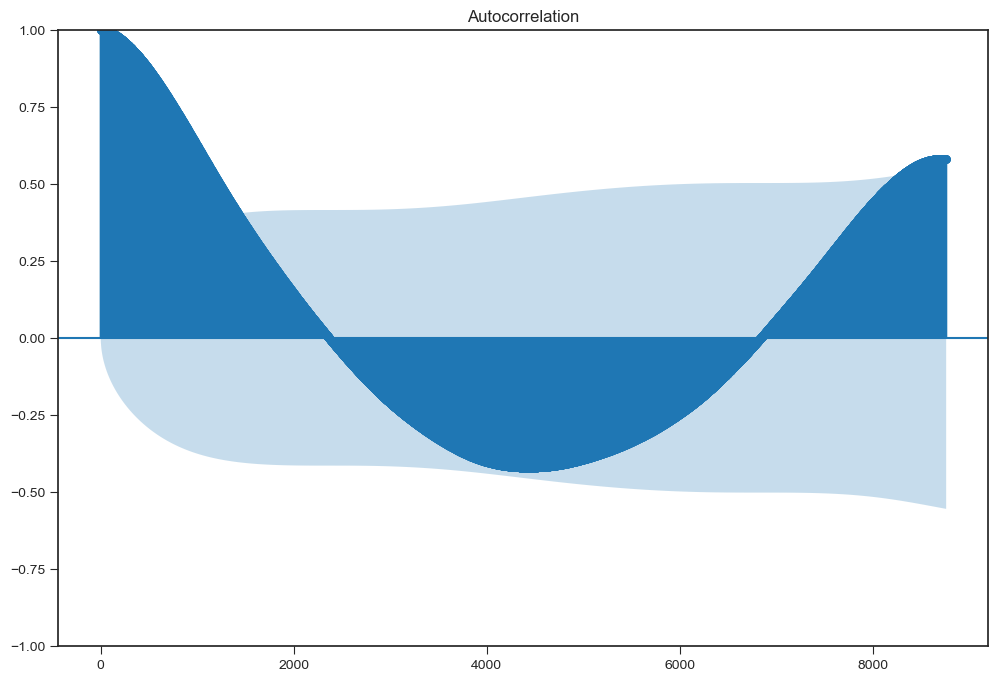

In [7]:
# Plot the ACF for the resampled data
fig, ax = plt.subplots(figsize=(12, 8))
plot_acf(X_all['h'], ax=ax, lags=8760)  # Use a smaller number of lags for daily data
plt.show()

<Figure size 640x480 with 0 Axes>

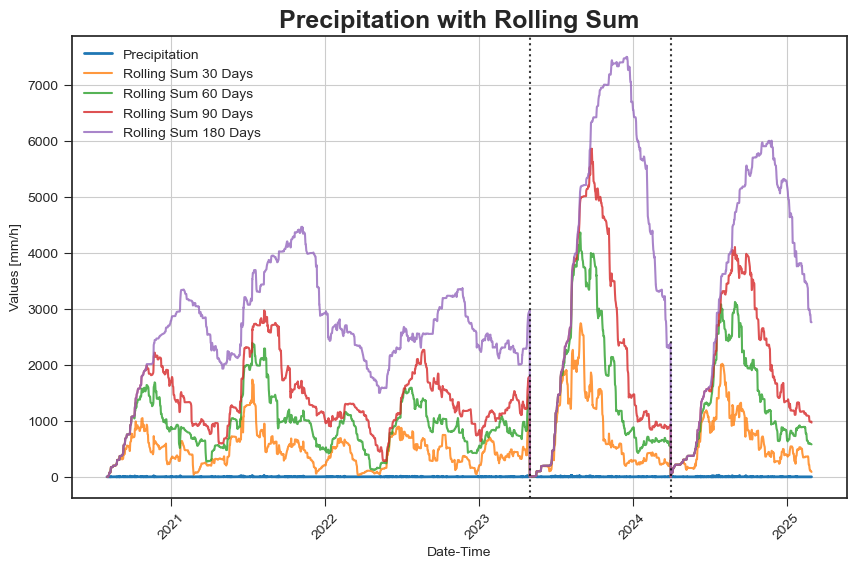

In [9]:
# Plotting all precipitation data
plt.clf()
plt.figure(figsize=(10, 6))

# Adding labels and title
plt.title('Precipitation with Rolling Sum', fontsize=18, fontweight='bold')
plt.plot(dates, X_all['P'], label='Precipitation', linewidth=2)
plt.plot(dates, X_all['P_RS_030'], label='Rolling Sum 30 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_060'], label='Rolling Sum 60 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_090'], label='Rolling Sum 90 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_180'], label='Rolling Sum 180 Days', alpha=.8)
plt.axvline(x=dates.iloc[split_idx_val], color='black', alpha=0.8, linestyle=':')
plt.axvline(x=dates.iloc[split_idx_test], color='black', alpha=0.8, linestyle=':')
plt.xlabel('Date-Time')
plt.ylabel('Values [mm/h]')

# Show plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)  
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

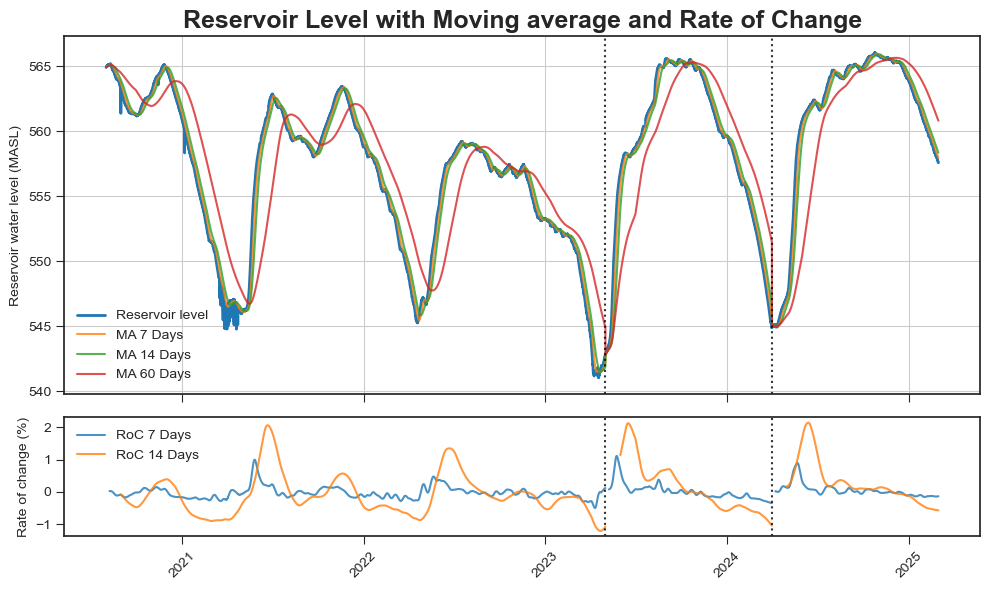

In [17]:
# Plotting all reservoir data
plt.clf()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)  

# Adding labels and title
ax1.set_title('Reservoir Level with Moving average and Rate of Change', fontsize=18, fontweight='bold')
ax1.plot(dates, X_all['h'], label='Reservoir level', linewidth=2)
ax1.plot(dates, X_all['h_MA_007'], label='MA 7 Days', alpha=.8)
ax1.plot(dates, X_all['h_MA_014'], label='MA 14 Days', alpha=.8)
ax1.plot(dates, X_all['h_MA_060'], label='MA 60 Days', alpha=.8)
ax1.axvline(x=dates.iloc[split_idx_val], color='black', alpha=0.8, linestyle=':')
ax1.axvline(x=dates.iloc[split_idx_test], color='black', alpha=0.8, linestyle=':')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Reservoir water level (MASL)')
ax1.legend(loc='lower left')
ax1.grid(True)

ax2.plot(dates, X_all['h_RC_007'], label='RoC 7 Days', alpha=.8)
ax2.plot(dates, X_all['h_RC_030'], label='RoC 14 Days', alpha=.8)
ax2.axvline(x=dates.iloc[split_idx_val], color='black', alpha=0.8, linestyle=':')
ax2.axvline(x=dates.iloc[split_idx_test], color='black', alpha=0.8, linestyle=':')
ax2.set_ylabel('Rate of change (%)')
ax2.grid(True)
ax2.legend(loc='upper left')

# Show plot
plt.xticks(rotation=45)  
fig.tight_layout()  

plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

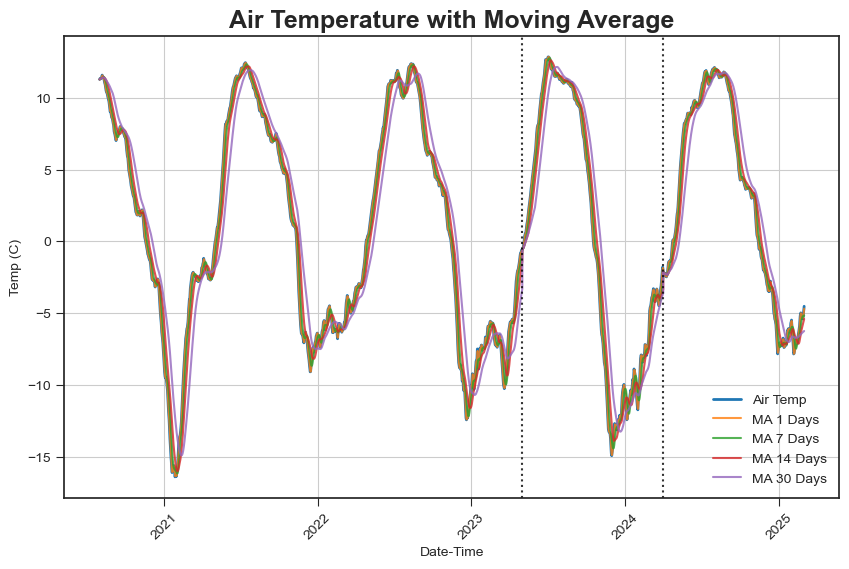

In [16]:
# Plotting all precipitation data
plt.clf()
plt.figure(figsize=(10, 6))

# Adding labels and title
plt.title('Air Temperature with Moving Average', fontsize=18, fontweight='bold')
plt.plot(dates, X_all['T'], label='Air Temp', linewidth=2)
plt.plot(dates, X_all['T_MA_001'], label='MA 1 Days', alpha=.8)
plt.plot(dates, X_all['T_MA_007'], label='MA 7 Days', alpha=.8)
plt.plot(dates, X_all['T_MA_014'], label='MA 14 Days', alpha=.8)
plt.plot(dates, X_all['T_MA_030'], label='MA 30 Days', alpha=.8)
plt.axvline(x=dates.iloc[split_idx_val], color='black', alpha=0.8, linestyle=':')
plt.axvline(x=dates.iloc[split_idx_test], color='black', alpha=0.8, linestyle=':')
plt.xlabel('Date-Time')
plt.ylabel('Temp (C)')

# Show plot
plt.legend(loc='lower right')
plt.xticks(rotation=45)  
plt.grid()
plt.show()